# 1. Entrenamiento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_yolov5_results(results_csv_path):
    df = pd.read_csv(results_csv_path)

    # Limpia los nombres de columnas
    df.columns = df.columns.str.strip()

    # Usa la columna 'epoch' si existe, sino usa el índice
    epochs = df['epoch'] if 'epoch' in df.columns else df.index

    # 1. Training vs Validation Losses
    loss_groups = {
        'Box Loss': ('train/box_loss', 'val/box_loss'),
        'Objectness Loss': ('train/obj_loss', 'val/obj_loss'),
        'Class Loss': ('train/cls_loss', 'val/cls_loss')
    }

    for title, (train_col, val_col) in loss_groups.items():
        if train_col in df.columns and val_col in df.columns:
            plt.figure()
            plt.plot(epochs, df[train_col], label='Train')
            plt.plot(epochs, df[val_col], label='Val')
            plt.title(f'{title} over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(title)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    # 2. Evaluation Metrics
    metric_cols = {
        'Precision': 'metrics/precision',
        'Recall': 'metrics/recall',
        'mAP@0.5': 'metrics/mAP_0.5',
        'mAP@0.5:0.95': 'metrics/mAP_0.5:0.95'
    }

    for title, col in metric_cols.items():
        if col in df.columns:
            plt.figure()
            plt.plot(epochs, df[col])
            plt.title(f'{title} over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(title)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def plot_yolov5_results_custom(results_csv_path):
    df = pd.read_csv(results_csv_path)
    df.columns = df.columns.str.strip()

    epochs = df['epoch'] if 'epoch' in df.columns else df.index

    # 1. Training vs Validation Losses
    loss_groups = {
        'Box Loss': ('train/box_loss', 'val/box_loss'),
        'Class Loss': ('train/cls_loss', 'val/cls_loss'),
        'DFL Loss': ('train/dfl_loss', 'val/dfl_loss')
    }

    for title, (train_col, val_col) in loss_groups.items():
        if train_col in df.columns and val_col in df.columns:
            plt.figure()
            plt.plot(epochs, df[train_col], label='Train')
            plt.plot(epochs, df[val_col], label='Val')
            plt.title(f'{title} over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(title)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    # 2. Evaluation Metrics
    metric_cols = {
        'Precision': 'metrics/precision(B)',
        'Recall': 'metrics/recall(B)',
        'mAP@0.5': 'metrics/mAP50(B)',
        'mAP@0.5:0.95': 'metrics/mAP50-95(B)'
    }

    for title, col in metric_cols.items():
        if col in df.columns:
            plt.figure()
            plt.plot(epochs, df[col])
            plt.title(f'{title} over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(title)
            plt.grid(True)
            plt.tight_layout()
            plt.show()


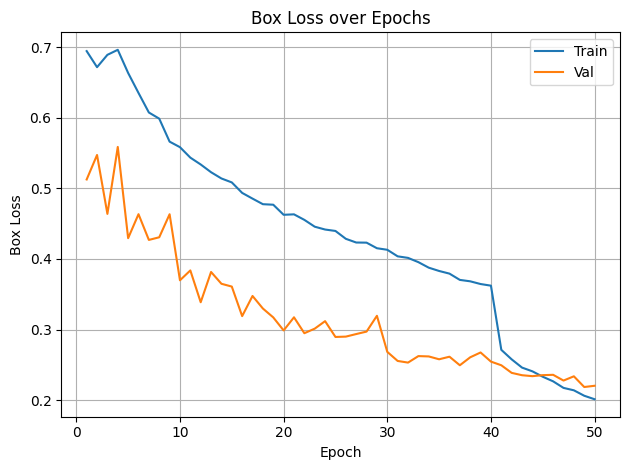

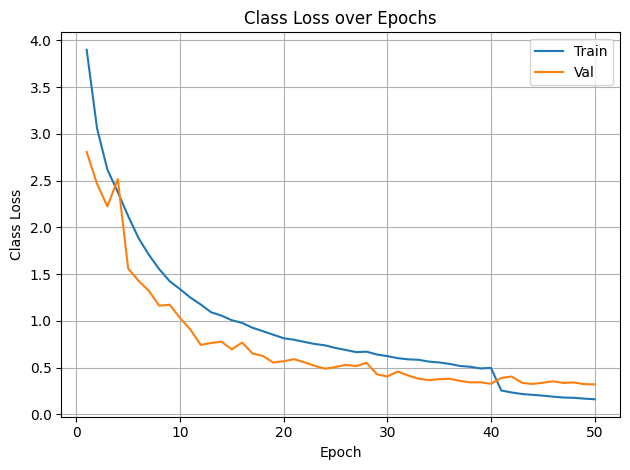

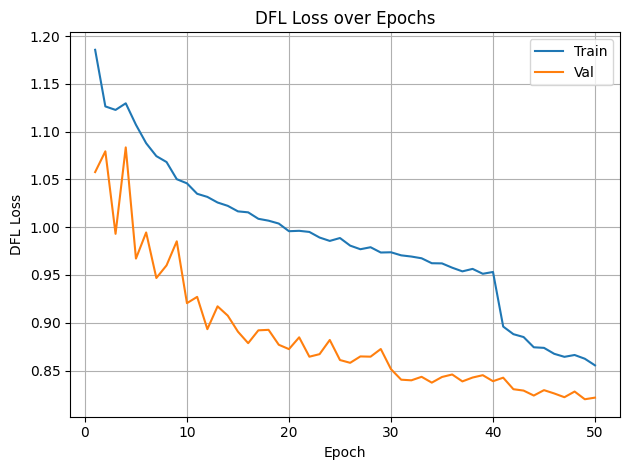

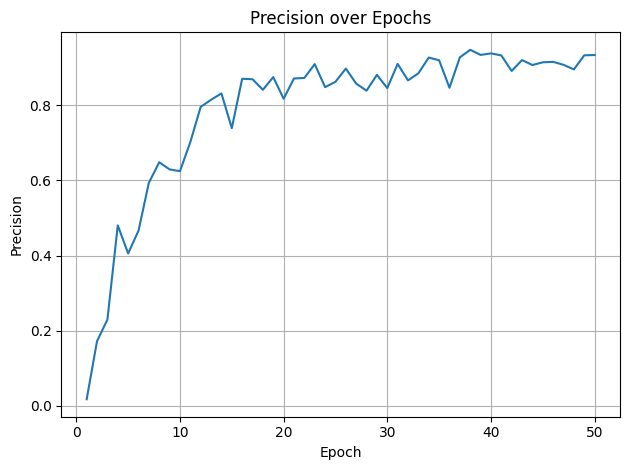

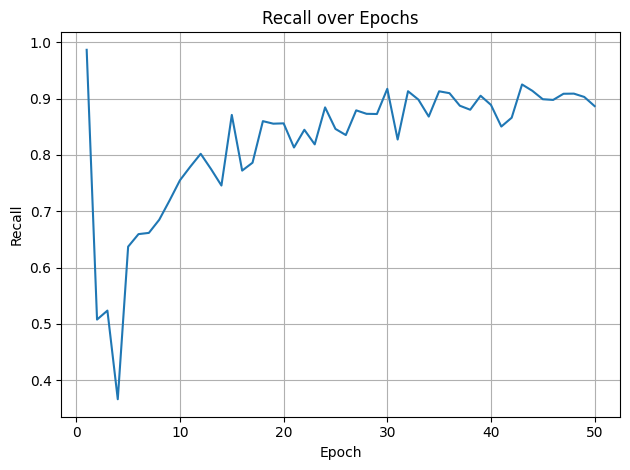

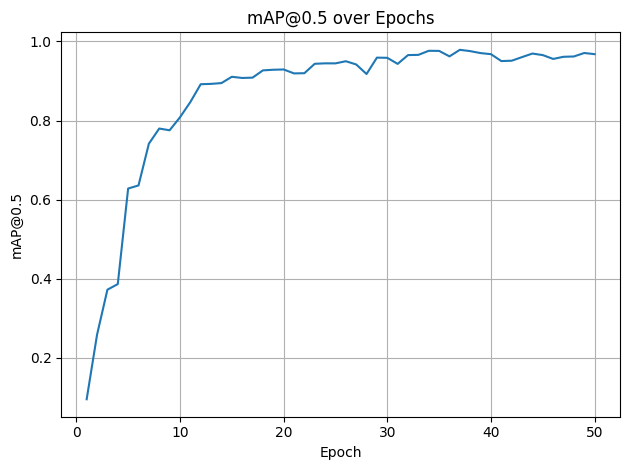

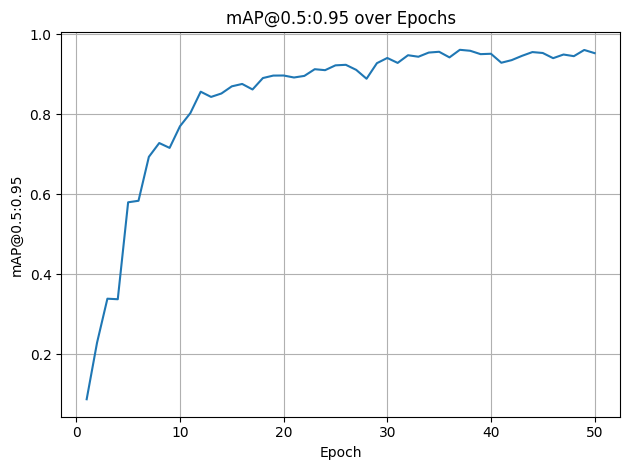

In [5]:
plot_yolov5_results_custom('yolov5/train/results.csv')

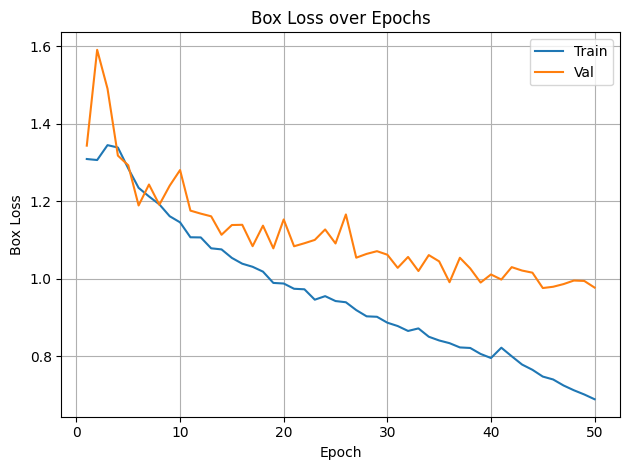

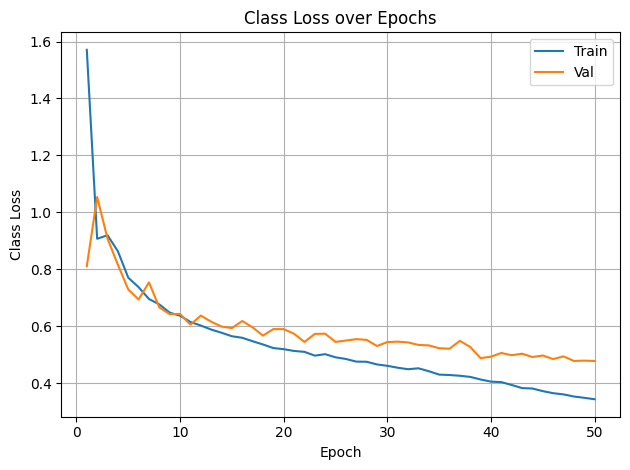

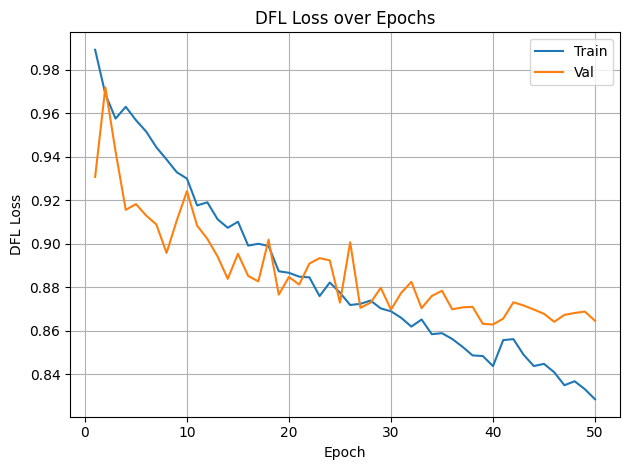

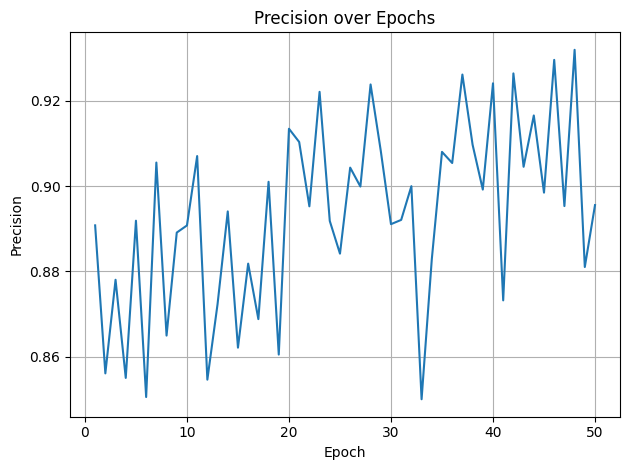

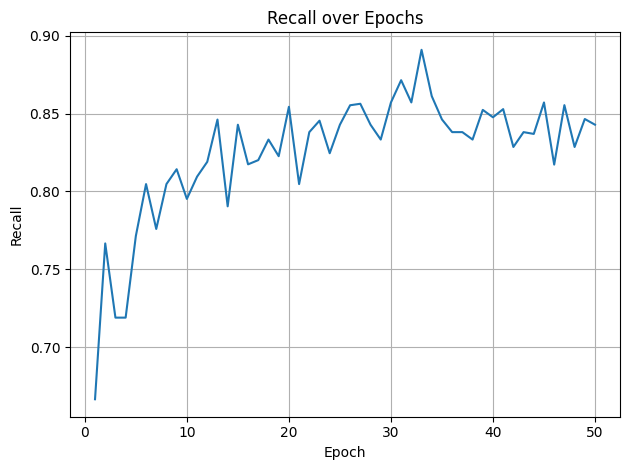

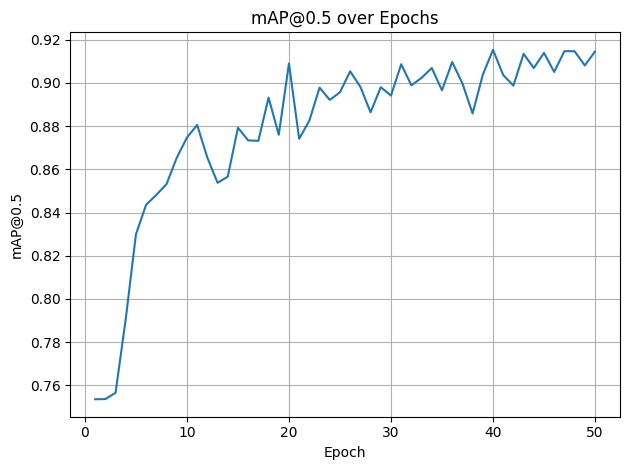

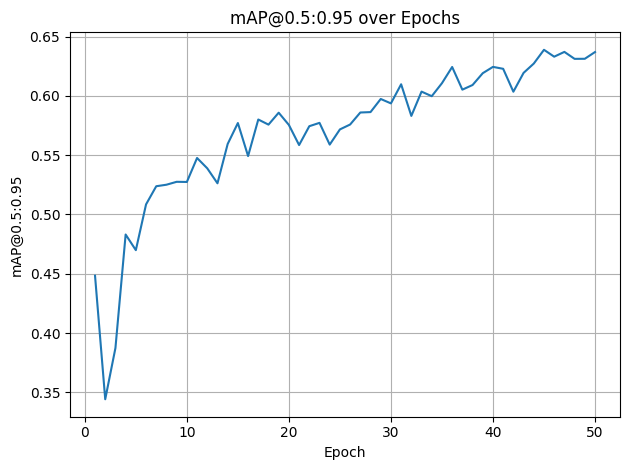

In [18]:
plot_yolov5_results_custom('yolov5/results.csv')

In [8]:
def calcular_f1(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)


In [9]:
import pandas as pd

def show_best_epoch_metrics(results_csv_path):
    df = pd.read_csv(results_csv_path)
    df.columns = df.columns.str.strip()

    # Buscar la fila con el mayor valor de mAP@0.5:0.95
    best_row = df.loc[df['metrics/mAP50-95(B)'].idxmax()]

    print(f"📌 Mejor época: {int(best_row['epoch'])}")
    print("📈 Métricas:")
    print(f"  - Precision: {best_row['metrics/precision(B)']:.4f}")
    print(f"  - Recall: {best_row['metrics/recall(B)']:.4f}")
    print(f"  - mAP@0.5: {best_row['metrics/mAP50(B)']:.4f}")
    print(f"  - mAP@0.5:0.95: {best_row['metrics/mAP50-95(B)']:.4f}")
    print("📉 Pérdidas:")
    print(f"  - Train Box Loss: {best_row['train/box_loss']:.4f}")
    print(f"  - Val Box Loss: {best_row['val/box_loss']:.4f}")
    print(f"  - Train Class Loss: {best_row['train/cls_loss']:.4f}")
    print(f"  - Val Class Loss: {best_row['val/cls_loss']:.4f}")
    print(f"  - Train DFL Loss: {best_row['train/dfl_loss']:.4f}")
    print(f"  - Val DFL Loss: {best_row['val/dfl_loss']:.4f}")

    precision = best_row['metrics/precision(B)']
    recall = best_row['metrics/recall(B)']

    f1 = calcular_f1(precision, recall)
    print(f"F1 Score: {f1:.4f}")


In [13]:
show_best_epoch_metrics('yolov5/train/results.csv')

📌 Mejor época: 37
📈 Métricas:
  - Precision: 0.9276
  - Recall: 0.8873
  - mAP@0.5: 0.9790
  - mAP@0.5:0.95: 0.9617
📉 Pérdidas:
  - Train Box Loss: 0.3703
  - Val Box Loss: 0.2495
  - Train Class Loss: 0.5184
  - Val Class Loss: 0.3590
  - Train DFL Loss: 0.9538
  - Val DFL Loss: 0.8387
F1 Score: 0.9070


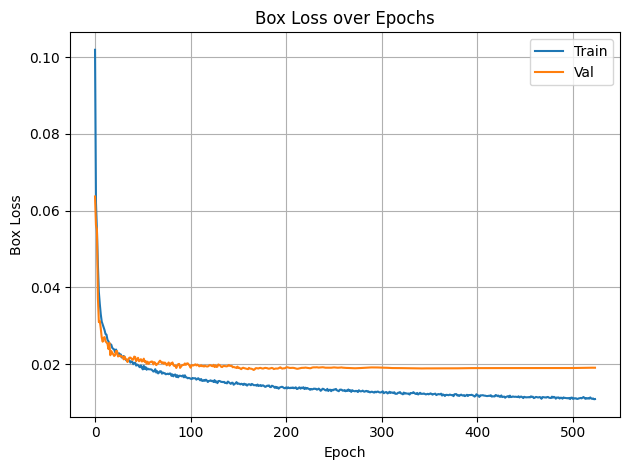

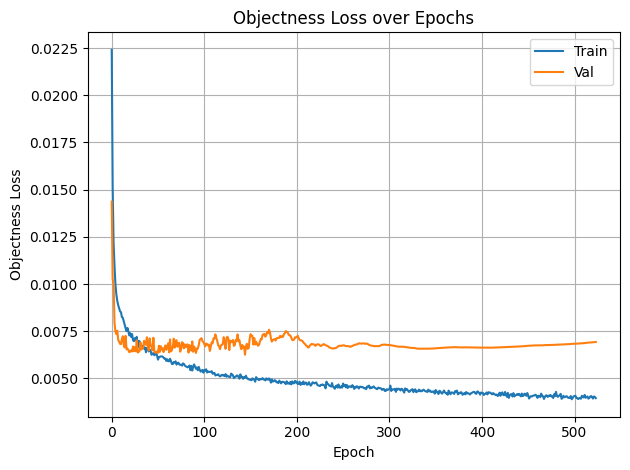

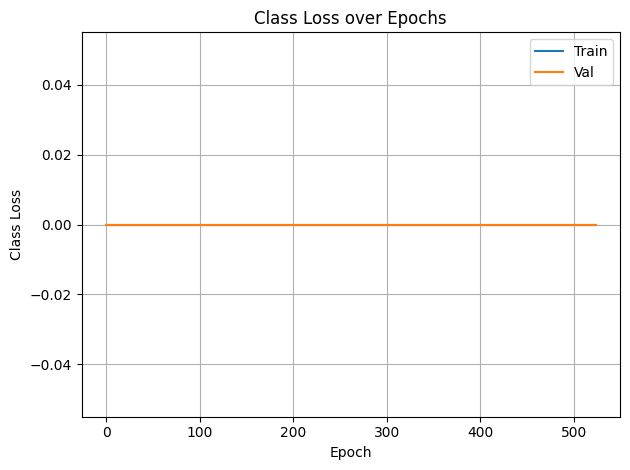

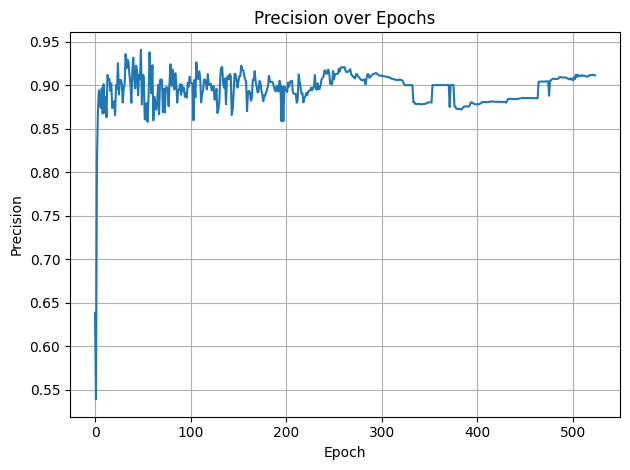

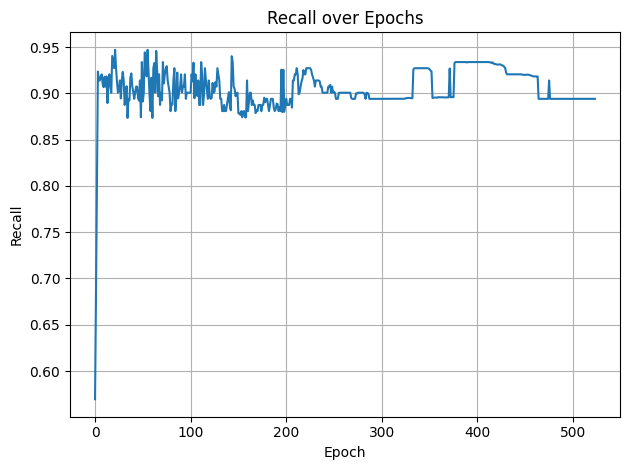

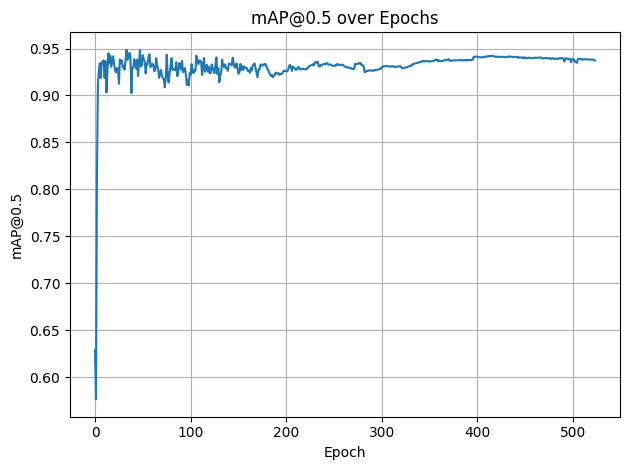

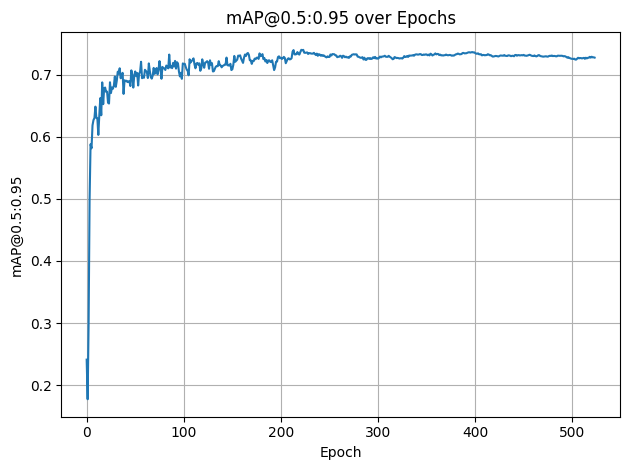

In [11]:
plot_yolov5_results('yolov5/train/yolov5s_results/results.csv')

In [9]:
import pandas as pd

df = pd.read_csv('yolov5/train/yolov5s_results/results.csv')
print(df.columns.tolist())

['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']
